In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load Data
df = pd.read_csv("latin_american_restaurants.csv")
df.head()


,id,name,rating,review_count,price,city,address,latitude,longitude,category,phone,url,price_level
0,GQwdg3e2MzPORQFf7r7Kug,Mrs. Rosa's Latin Kitchen,5.0,6,NaN,"Atlanta, GA","3940 Peachtree Industrial Blvd Ste C Duluth, G...",33.985725,-84.170495,Latin American,(404) 992-1968,https://www.yelp.com/biz/mrs-rosas-latin-kitch...,NaN
1,LMuXS8dhMHqu7qdseUc35A,Buena Papa Fry Bar,4.9,16,NaN,"Atlanta, GA","1245 Glenwood Ave SE Atlanta, GA 30316",33.739960,-84.346650,"Fast Food, Latin American",NaN,https://www.yelp.com/biz/buena-papa-fry-bar-at...,NaN
2,imK2KdIySXdbj0FI8YPD8A,La Tropical,4.8,13,NaN,"Atlanta, GA","1235 Chattahoochee Ave NW Atlanta, GA 30318",33.802834,-84.428593,"Latin American, Cuban, Puerto Rican",NaN,https://www.yelp.com/biz/la-tropical-atlanta?a...,NaN
3,n20rQSzceONC3eQRnprmhQ,Arepa Grill,4.7,45,NaN,"Atlanta, GA","4166 Buford Hwy NE Atlanta, GA 30345",33.864933,-84.308241,Venezuelan,(678) 974-7795,https://www.yelp.com/biz/arepa-grill-atlanta?a...,NaN
4,tuNjPUE2QF1FroLFYwLAWg,La Semilla,4.7,199,$$,"Atlanta, GA","780 Memorial Dr SE Ste 4A Atlanta, GA 30316",33.746807,-84.361559,"Latin American, Vegan",NaN,https://www.yelp.com/biz/la-semilla-atlanta?ad...,2.0


In [3]:
# Clean Data

# Ensure numeric fields are numeric
numeric_cols = ["rating", "review_count", "price_level"]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows missing critical info
df = df.dropna(subset=["rating", "review_count"])

print("Final dataset size:", df.shape)


Final dataset size: (1895, 13)


In [5]:
# Summary Statistics
print("\n=== Summary Statistics for Numeric Features ===")
print(df[["rating", "review_count", "price_level"]].describe())

print("\n=== Count of Businesses by Category ===")
print(df["category"].value_counts().head(10))


=== Summary Statistics for Numeric Features ===
            rating  review_count  price_level
count  1895.000000   1895.000000  1221.000000
mean      4.066069    377.979947     1.832924
std       0.674951    710.152999     0.599123
min       0.000000      0.000000     1.000000
25%       3.800000     21.000000     1.000000
50%       4.100000    110.000000     2.000000
75%       4.400000    402.500000     2.000000
max       5.000000   7962.000000     4.000000

=== Count of Businesses by Category ===
category
Latin American              166
Salvadoran                   93
Mexican                      74
Colombian                    53
Venezuelan                   41
Mexican, Latin American      34
Mexican, Salvadoran          28
Salvadoran, Mexican          24
Latin American, Mexican      20
Latin American, Peruvian     19
Name: count, dtype: int64


<>:46: SyntaxWarning: invalid escape sequence '\$'
<>:46: SyntaxWarning: invalid escape sequence '\$'
C:\Users\danie\AppData\Local\Temp\ipykernel_6356\2494642224.py:46: SyntaxWarning: invalid escape sequence '\$'
  plt.xlabel("Price Level (\$ = 1, \$\$ = 2, \$\$\$ = 3, etc.)")


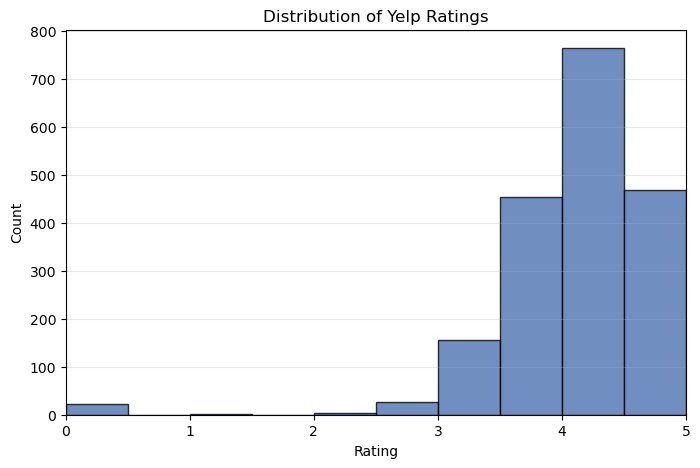

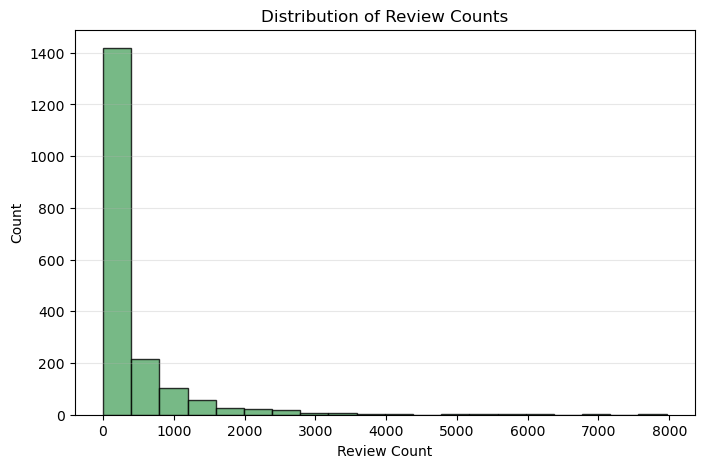

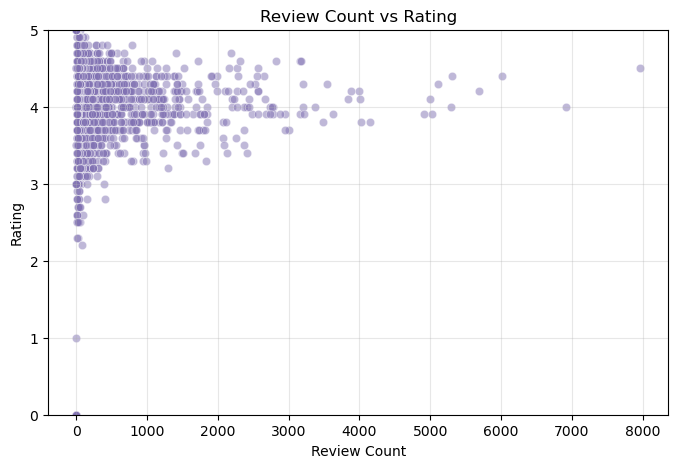

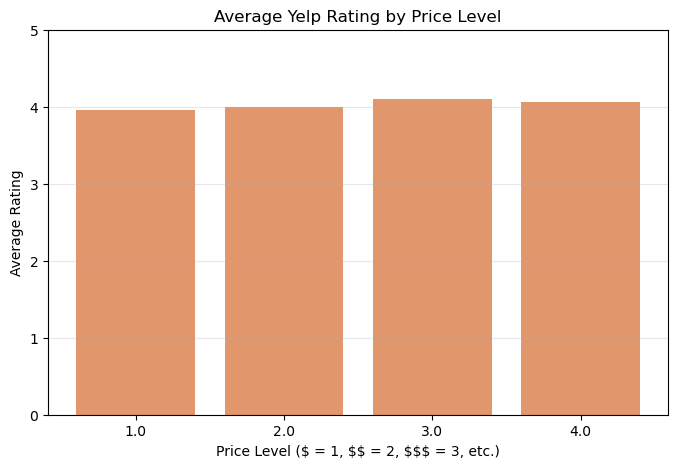

In [ ]:
#  -----------------------------
# 1. Rating Histogram
# -----------------------------
plt.figure(figsize=(8,5))
plt.hist(df["rating"], bins=10, color="#4C72B0", edgecolor="black", alpha=0.8)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Yelp Ratings")
plt.ylim(0, None)
plt.xlim(0, 5)
plt.grid(axis="y", alpha=0.3)
plt.show()

# -----------------------------
# 2. Review Count Histogram
# -----------------------------
plt.figure(figsize=(8,5))
plt.hist(df["review_count"], bins=20, color="#55A868", edgecolor="black", alpha=0.8)
plt.xlabel("Review Count")
plt.ylabel("Count")
plt.title("Distribution of Review Counts")
plt.grid(axis="y", alpha=0.3)
plt.show()

# -----------------------------
# 4. Review Count vs Rating Scatter Plot
# -----------------------------
plt.figure(figsize=(8,5))
plt.scatter(df["review_count"], df["rating"], alpha=0.5, color="#8172B3", edgecolor="white", linewidth=0.5)
plt.xlabel("Review Count")
plt.ylabel("Rating")
plt.title("Review Count vs Rating")
plt.ylim(0, 5)   # Fix y-axis here
plt.grid(alpha=0.3)
plt.show()

# -----------------------------
# 5. Price Level vs Rating
# -----------------------------
if "price_level" in df.columns:
    price_rating = df.groupby("price_level")["rating"].mean()

    plt.figure(figsize=(8,5))
    plt.bar(price_rating.index.astype(str), price_rating.values, 
            color="#DD8452", alpha=0.85)
    plt.xlabel("Price Level (\$ = 1, \$\$ = 2, \$\$\$ = 3, etc.)")
    plt.ylabel("Average Rating")
    plt.title("Average Yelp Rating by Price Level")
    plt.ylim(0, 5)
    plt.grid(axis="y", alpha=0.3)
    plt.show()
